# In this Project I will find the best call of duty player of 2019!

- Critiria: Best player is the player that has the highest  for following criteria:
- killer= kills - deaths
- winner= wins - losses
- the best player= killer + winner - timePlayed

In [31]:
# Importing the holy trinity of data science.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting seaborn online to give our graphics a kick.
import seaborn as sns
sns.set()

In [32]:
df = pd.read_csv("cod.csv")

In [33]:
df

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [34]:
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [35]:
df.keys()

Index(['name', 'wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses',
       'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime',
       'gamesPlayed', 'assists', 'misses', 'xp', 'scorePerMinute', 'shots',
       'deaths'],
      dtype='object')

Predictions!!

- players with most kills and less deaths.

- players with more wins.

In [36]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [37]:
#findind the player with most kill's details
df[df["kills"]==66935.000000]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1120,COPA#2901463,1741,66935,1.417244,28,344,16,111,135447,4192,11204,2.809651,1492,10441,652233,11080512,203.78416,787680,47229


In [38]:
66935-47229

19706

In [46]:
#finding players with more kills than death
koverd=df[(df["kills"] > df["deaths"]) & (df["wins"] > df["losses"])]

In [47]:
koverd[0:5]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
5,Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,2.323129,588,6063,305319,3932335,255.672035,403651,25321
8,MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,2.826389,864,4029,327230,4269370,198.844226,408591,21032
12,CzarnyDelfinek#9059572,188,1949,1.495779,22,53,4,57,3333,409,536,16.360000,25,150,10511,909543,38.630318,13844,1303
18,LimpThaDon,190,3033,1.009990,13,37,8,110,9846,421,489,2.520958,167,583,42460,458078,152.730641,52306,3003
26,HORUS REED#8123889,349,9899,1.399943,13,238,10,112,14482,1621,2062,9.648810,168,1016,62300,6541499,51.627390,76782,7071


In [65]:
#finding the player with more wins 
koverd.sort_values(by="wins",ascending=False)[0:5]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,koverd
186,SPoOKY#6529753,2282,38200,1.149702,13,331,16,111,51440,6425,4707,2.974537,2160,6259,354971,10525046,199.797292,406411,33226,4974
132,DStizzy#2268939,1824,34198,1.114704,27,287,13,110,73630,3050,5025,3.841310,794,4501,250976,8658231,161.607541,324606,30679,3519
1120,COPA#2901463,1741,66935,1.417244,28,344,16,111,135447,4192,11204,2.809651,1492,10441,652233,11080512,203.784160,787680,47229,19706
1153,VODKA#3550738,1505,22046,1.133296,14,163,17,111,58771,2878,4188,2.717658,1059,2134,222429,3313091,237.565393,281200,19453,2593
990,Ragnar_Lodbrok#4477458,1364,19359,1.219004,16,262,18,111,34808,3744,3198,5.664145,661,2195,107096,7589428,116.293269,141904,15881,3478


In [158]:
#creating kill over death column
df["koverd"]=df["kills"]-df["deaths"]

In [159]:
#creating wins over losses column
df["woverl"]=df["wins"]-df["losses"]

In [160]:
#create sum column to determine the best player
df["sum"]=df["koverd"]+df["woverl"]-df["timePlayed"]

In [161]:
df.head()


,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,koverd,woverl,sum
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,...,0,0,0,700,0.0,0,16,-16,0,-23
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,...,0,1,0,48300,0.0,0,64,2,0,-30
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,...,0,0,0,1150,0.0,0,5,-3,3,-3
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,...,0,0,0,1000,0.0,0,10,-8,0,-13


In [162]:
df.sort_values(by="sum",ascending=False)[0:5]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,koverd,woverl,sum
1120,COPA#2901463,1741,66935,1.417244,28,344,16,111,135447,4192,...,1492,10441,652233,11080512,203.784160,787680,47229,19706,1725,17239
1011,GLOMIMESS#6744363,413,21473,2.171183,54,177,29,111,72010,1162,...,488,3259,213698,3928209,197.715491,285708,9890,11583,384,10805
477,L9Nx TED#8865336,1077,25196,1.910525,28,210,11,111,67430,2337,...,773,2897,206417,5345118,199.786393,273847,13188,12008,1066,10737
623,Prime 0117#7592199,1151,35285,1.422381,20,245,38,111,109984,2903,...,890,6081,369027,6822913,195.783534,479011,24807,10478,1113,8688
739,II Wartaken II#8674285,410,18819,1.851171,37,142,24,12,65224,1058,...,610,2492,265349,2488505,315.395841,330573,10166,8653,386,7981


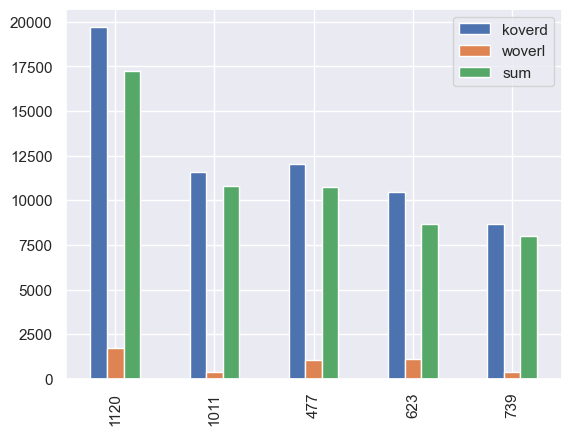

In [172]:
df2 = pd.DataFrame(df.sort_values(by="sum",ascending=False)[0:5], columns=["koverd", "woverl", "sum", ])
df2.plot.bar();


In [177]:
#THE BEST CALL OS DUTY PLAYER IN 2019 WAS 1120	COPA#2901463
df[df["sum"]==df["sum"].max()]

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,koverd,woverl,sum
1120,COPA#2901463,1741,66935,1.417244,28,344,16,111,135447,4192,...,1492,10441,652233,11080512,203.78416,787680,47229,19706,1725,17239
